In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import iqr
import numpy as np
import seaborn as sns

In [8]:
df = pd.read_csv('winemag-data-130k-v2.csv', index_col = 0)
df.shape

(129971, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [10]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


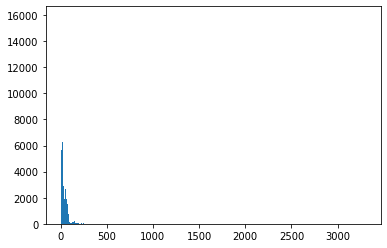

In [17]:
plt.hist(df.price, bins = 1000)
plt.show()

In [19]:
iqr(df.price)

nan

In [23]:
iqr_price = iqr(df[['price']].dropna().price)

In [28]:
third_quantile = np.quantile(df[['price']].dropna().price, .75)
third_quantile

42.0

In [30]:
upper_fence = third_quantile + 3*iqr_price
upper_fence

117.0

In [31]:
df = df[df.price <= upper_fence]

In [32]:
df.shape

(118299, 13)

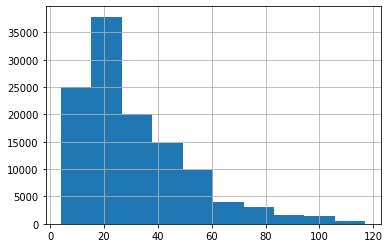

In [33]:
df.price.hist()

In [36]:
df.taster_name.value_counts()

Roger Voss            19368
Michael Schachner     14699
Kerin O’Keefe          9545
Paul Gregutt           9457
Virginie Boone         9133
Matt Kettmann          6214
Sean P. Sullivan       4895
Joe Czerwinski         4860
Anna Lee C. Iijima     4321
Jim Gordon             4152
Anne Krebiehl MW       3385
Lauren Buzzeo          1707
Susan Kostrzewa        1069
Mike DeSimone           502
Jeff Jenssen            484
Alexander Peartree      412
Carrie Dykes            138
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118299 entries, 1 to 129970
Data columns (total 13 columns):
country                  118240 non-null object
description              118299 non-null object
designation              84060 non-null object
points                   118299 non-null int64
price                    118299 non-null float64
province                 118240 non-null object
region_1                 98933 non-null object
region_2                 49436 non-null object
taster_name              94374 non-null object
taster_twitter_handle    89503 non-null object
title                    118299 non-null object
variety                  118298 non-null object
winery                   118299 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 12.6+ MB


In [45]:
df.drop(df[df.variety.isna()].index, inplace = True)

In [46]:
df.variety.nunique()

693

In [47]:
df.country.nunique()

42

In [83]:
df.country.value_counts()

US                        53403
France                    16972
Italy                     16406
Spain                      6420
Portugal                   4818
Chile                      4381
Argentina                  3693
Austria                    2788
Australia                  2218
Germany                    2041
New Zealand                1371
South Africa               1287
Israel                      487
Greece                      461
Canada                      253
Bulgaria                    141
Hungary                     139
Romania                     119
Uruguay                     107
Turkey                       89
Georgia                      84
Slovenia                     80
Croatia                      71
Mexico                       70
England                      69
Moldova                      59
Brazil                       47
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [48]:
df.designation.nunique()

34919

In [49]:
df.points.nunique()

21

In [51]:
df.points.value_counts().sort_index()

80       395
81       679
82      1771
83      2883
84      6089
85      8891
86     11717
87     15720
88     15939
89     11225
90     14173
91     10367
92      8571
93      5485
94      2917
95      1048
96       295
97       101
98        24
99         6
100        2
Name: points, dtype: int64

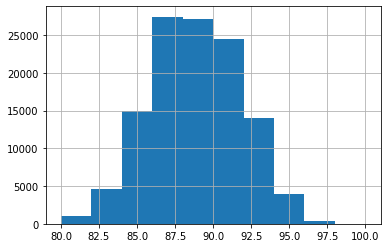

In [52]:
df.points.hist()

In [56]:
df.province.nunique()

421

In [57]:
df.region_1.nunique()

1178

In [58]:
df.region_2.nunique()

17

<BarContainer object of 6 artists>

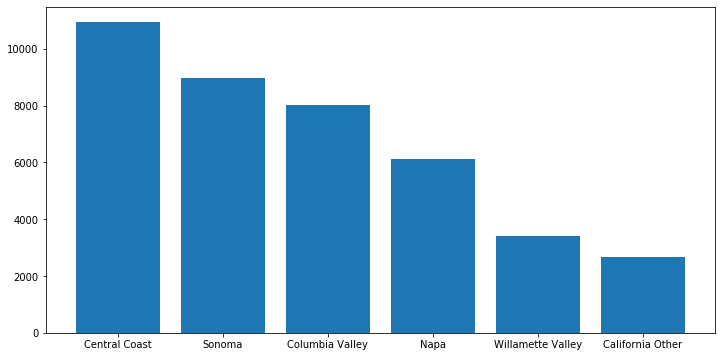

In [82]:
plt.figure(figsize = (12,6))
plt.bar(x = df.region_2.value_counts()[0:6].index, height = df.region_2.value_counts()[0:6].values)

In [76]:
df.region_2.value_counts()[0:6].values

array([10941,  8957,  8018,  6136,  3397,  2660])

In [92]:
df.variety.value_counts()[0:11]

Pinot Noir                  12484
Chardonnay                  10895
Cabernet Sauvignon           8793
Red Blend                    8307
Bordeaux-style Red Blend     5044
Riesling                     4894
Sauvignon Blanc              4782
Syrah                        4025
Rosé                         3260
Merlot                       3026
Zinfandel                    2708
Name: variety, dtype: int64

In [90]:
iqr_variety = iqr(df.variety.value_counts().values)

In [91]:
quantile_one_variety = np.quantile(df.variety.value_counts().values, .25)
quantile_one_variety

2.0

In [94]:
df = df[df.variety.isin(df.variety.value_counts()[0:11].index)]

In [99]:
df.reset_index(inplace = True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68218 entries, 0 to 68217
Data columns (total 14 columns):
index                    68218 non-null int64
country                  68195 non-null object
description              68218 non-null object
designation              47294 non-null object
points                   68218 non-null int64
price                    68218 non-null float64
province                 68195 non-null object
region_1                 58661 non-null object
region_2                 38251 non-null object
taster_name              53025 non-null object
taster_twitter_handle    49622 non-null object
title                    68218 non-null object
variety                  68218 non-null object
winery                   68218 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 7.3+ MB


In [101]:
df.variety.value_counts()

Pinot Noir                  12484
Chardonnay                  10895
Cabernet Sauvignon           8793
Red Blend                    8307
Bordeaux-style Red Blend     5044
Riesling                     4894
Sauvignon Blanc              4782
Syrah                        4025
Rosé                         3260
Merlot                       3026
Zinfandel                    2708
Name: variety, dtype: int64

In [104]:
df[['designation', 'title']]

,designation,title
0,Reserve Late Harvest,St. Julian 2013 Reserve Late Harvest Riesling ...
1,Vintner's Reserve Wild Child Block,Sweet Cheeks 2012 Vintner's Reserve Wild Child...
2,Mountain Cuvée,Kirkland Signature 2011 Mountain Cuvée Caberne...
3,NaN,Louis M. Martini 2012 Cabernet Sauvignon (Alex...
4,NaN,Mirassou 2012 Chardonnay (Central Coast)
5,Devon,Richard Böcking 2013 Devon Riesling (Mosel)
6,Vin de Maison,Quiévremont 2012 Vin de Maison Red (Virginia)
7,NaN,Acrobat 2013 Pinot Noir (Oregon)
8,Signature Selection,Bianchi 2011 Signature Selection Merlot (Paso ...
9,King Ridge Vineyard,Castello di Amorosa 2011 King Ridge Vineyard P...


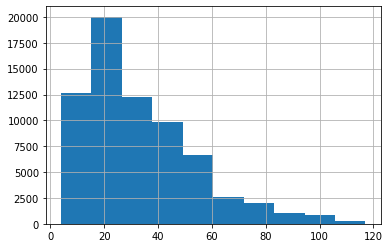

In [105]:
df.price.hist()

In [106]:
df.price.describe()

count    68218.000000
mean        33.437069
std         20.372339
min          4.000000
25%         18.000000
50%         28.000000
75%         45.000000
max        117.000000
Name: price, dtype: float64

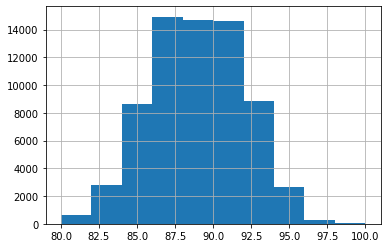

In [107]:
df.points.hist()

In [108]:
df.points.describe()

count    68218.000000
mean        88.423187
std          3.063125
min         80.000000
25%         86.000000
50%         88.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68218 entries, 0 to 68217
Data columns (total 14 columns):
index                    68218 non-null int64
country                  68195 non-null object
description              68218 non-null object
designation              47294 non-null object
points                   68218 non-null int64
price                    68218 non-null float64
province                 68195 non-null object
region_1                 58661 non-null object
region_2                 38251 non-null object
taster_name              53025 non-null object
taster_twitter_handle    49622 non-null object
title                    68218 non-null object
variety                  68218 non-null object
winery                   68218 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 7.3+ MB


In [110]:
df.country.nunique()

40

In [111]:
df.country.value_counts()

US                40898
France            10147
Italy              3942
Chile              3313
Germany            1761
Argentina          1457
New Zealand        1267
Spain              1156
Australia          1116
Austria             870
South Africa        768
Israel              345
Portugal            340
Canada              164
Greece              117
Bulgaria            110
Romania              82
Mexico               43
Slovenia             35
Turkey               35
Uruguay              35
Moldova              30
England              23
Hungary              23
Lebanon              22
Brazil               22
Morocco              20
Croatia              10
Peru                  7
Serbia                6
Ukraine               6
Georgia               5
Czech Republic        5
Macedonia             5
Cyprus                3
Luxembourg            2
India                 2
Switzerland           1
Armenia               1
Slovakia              1
Name: country, dtype: int64

In [112]:
df.province.nunique()

324

In [113]:
df.province.value_counts()

California                   28076
Washington                    6144
Oregon                        4083
Bordeaux                      3233
Burgundy                      2640
Tuscany                       2153
New York                      1815
Mendoza Province              1267
Mosel                          983
Provence                       950
Loire Valley                   916
Alsace                         794
Marlborough                    736
Casablanca Valley              575
South Australia                574
Veneto                         517
Colchagua Valley               515
Maipo Valley                   508
Sicily & Sardinia              479
Northern Spain                 431
Catalonia                      403
Southwest France               402
Virginia                       373
France Other                   330
Central Valley                 289
Languedoc-Roussillon           289
Champagne                      280
Maule Valley                   280
Rhône Valley        

In [114]:
df.taster_name.nunique()

19

In [115]:
df.taster_name.value_counts(dropna = False)

NaN                   15193
Roger Voss             9466
Virginie Boone         7568
Paul Gregutt           7065
Michael Schachner      5991
Matt Kettmann          4589
Sean P. Sullivan       3466
Anna Lee C. Iijima     3152
Joe Czerwinski         2885
Jim Gordon             2879
Kerin O’Keefe          2547
Anne Krebiehl MW       1187
Lauren Buzzeo           960
Susan Kostrzewa         498
Mike DeSimone           273
Jeff Jenssen            234
Alexander Peartree      185
Carrie Dykes             66
Fiona Adams              11
Christina Pickard         3
Name: taster_name, dtype: int64

In [116]:
df.winery.nunique()

11268

In [121]:
df.winery.value_counts(dropna=False).describe()

count    11268.000000
mean         6.054136
std         10.370773
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max        216.000000
Name: winery, dtype: float64